In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Introduction 

    Annual Academic Arts Program tuition fees for full-time international students at public post-secondary institutions by Economic Development Region (EDR) and by institution. Academic Years 2011/12 to 2019/20.

In [2]:
df = pd.read_csv('tui2_international_tuition_fees_at_public_post_secodary_institutions_by_economic_development_reg.csv')

In [3]:
df.head()

,Annual International Tuition Fees for Arts Program - Full-Time International Students by Economic Development Region,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"BC Public Post-Secondary Institutions, Academi...",NaN,NaN,NaN,NaN
1,Published Date - January 2020,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Year,Sector,Economic Development Region,Institution,Value
4,AY 2011/12,College,Vancouver Island/Coast,Camosun College,"$12,000"


# Cleaning

In [4]:
df.isna().sum()

Annual International Tuition Fees for Arts Program - Full-Time International Students by Economic Development Region    1
Unnamed: 1                                                                                                              3
Unnamed: 2                                                                                                              3
Unnamed: 3                                                                                                              3
Unnamed: 4                                                                                                              3
dtype: int64

In [5]:
column_name = ['Year','Sector','Economic Development Region','Institution','Value']

In [6]:
df = df.set_axis(column_name, axis=1, inplace=False)

In [7]:
df

,Year,Sector,Economic Development Region,Institution,Value
0,"BC Public Post-Secondary Institutions, Academi...",NaN,NaN,NaN,NaN
1,Published Date - January 2020,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Year,Sector,Economic Development Region,Institution,Value
4,AY 2011/12,College,Vancouver Island/Coast,Camosun College,"$12,000"
...,...,...,...,...,...
223,AY 2019/20,Teaching-Intensive University,Vancouver Island/Coast,Vancouver Island University,"$16,680"
224,AY 2019/20,Research-Intensive University,Mainland/Southwest,Simon Fraser University,"$24,799"
225,AY 2019/20,Research-Intensive University,Mainland/Southwest,University of British Columbia,"$38,052"
226,AY 2019/20,Research-Intensive University,Cariboo,University of Northern British Columbia,"$21,589"


In [8]:
df = df.dropna(thresh = 4)
df = df[1:]
df = df.reset_index(drop = True)

In [9]:
df['Year'] = df['Year'].apply( lambda x : re.sub("AY",'',x))

In [10]:
df['Value'] = df['Value'].apply( lambda x : re.sub(r'[^\d.]', '', x))
df['Value'] = df['Value'].apply( lambda x : int(x))

In [11]:
df['Sector'].unique()

array(['College', 'Institute', 'Teaching-Intensive University',
       'Research-Intensive University'], dtype=object)

In [12]:
df['Economic Development Region'].unique()

array(['Vancouver Island/Coast', 'Cariboo', 'Kootenay',
       'Mainland/Southwest', 'North', 'Thompson Okanagan'], dtype=object)

In [13]:
df['Institution'].unique()

array(['Camosun College', 'College of New Caledonia',
       'College of the Rockies', 'Douglas College', 'Langara College',
       'North Island College', 'Northern Lights College',
       'Coast Mountain College', 'Okanagan College', 'Selkirk College',
       'Vancouver Community College',
       'British Columbia Institute of Technology',
       'Nicola Valley Institute of Technology', 'Capilano University',
       'Emily Carr University of Art + Design',
       'Kwantlen Polytechnic University', 'Royal Roads University',
       'Thompson Rivers University', 'University of the Fraser Valley',
       'Vancouver Island University', 'Simon Fraser University',
       'University of British Columbia',
       'University of Northern British Columbia',
       'University of Victoria', 'Justice Institute of British Columbia'],
      dtype=object)

In [14]:
df.head()

,Year,Sector,Economic Development Region,Institution,Value
0,2011/12,College,Vancouver Island/Coast,Camosun College,12000
1,2011/12,College,Cariboo,College of New Caledonia,11490
2,2011/12,College,Kootenay,College of the Rockies,8194
3,2011/12,College,Mainland/Southwest,Douglas College,13500
4,2011/12,College,Mainland/Southwest,Langara College,15750


# EDA Part I : Sector

### College

In [15]:
df.loc[df['Sector'] == 'College']['Institution'].value_counts()

Douglas College                9
Northern Lights College        9
Coast Mountain College         9
Vancouver Community College    9
College of the Rockies         9
North Island College           9
Okanagan College               9
College of New Caledonia       9
Langara College                9
Selkirk College                9
Camosun College                9
Name: Institution, dtype: int64

In [16]:
x = df.loc[df['Sector'] == 'College']['Institution'].unique()

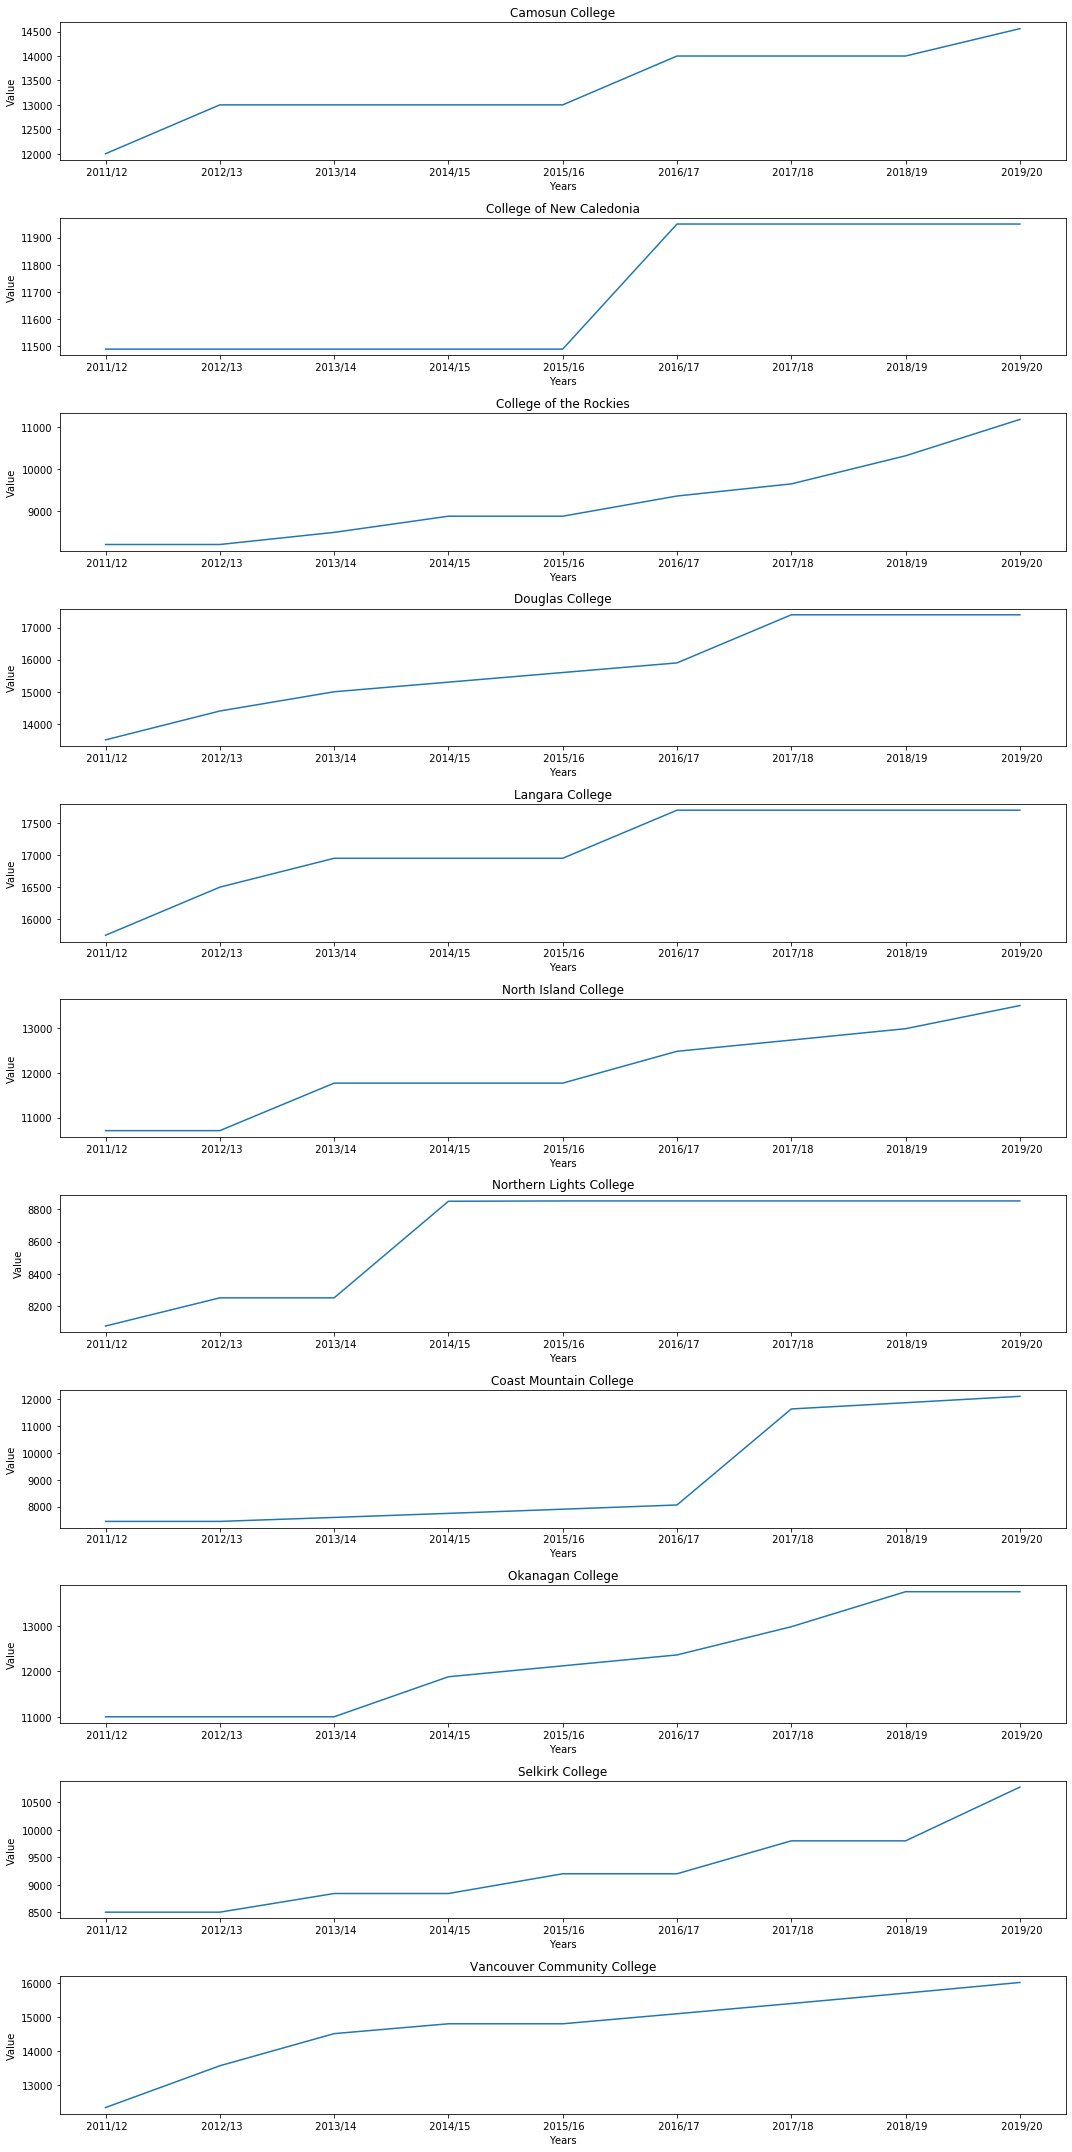

In [17]:
fig, ax = plt.subplots(11,figsize = (15,30))

num = 0 

for i in x:
    ax[num].plot(df.loc[(df['Sector'] == 'College') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Sector'] == 'College') & (df['Institution'] == i)]['Value'])
    ax[num].set_xlabel('Years')
    ax[num].set_ylabel('Value')
    ax[num].set_title(i)
    num = num + 1    
    
plt.tight_layout()

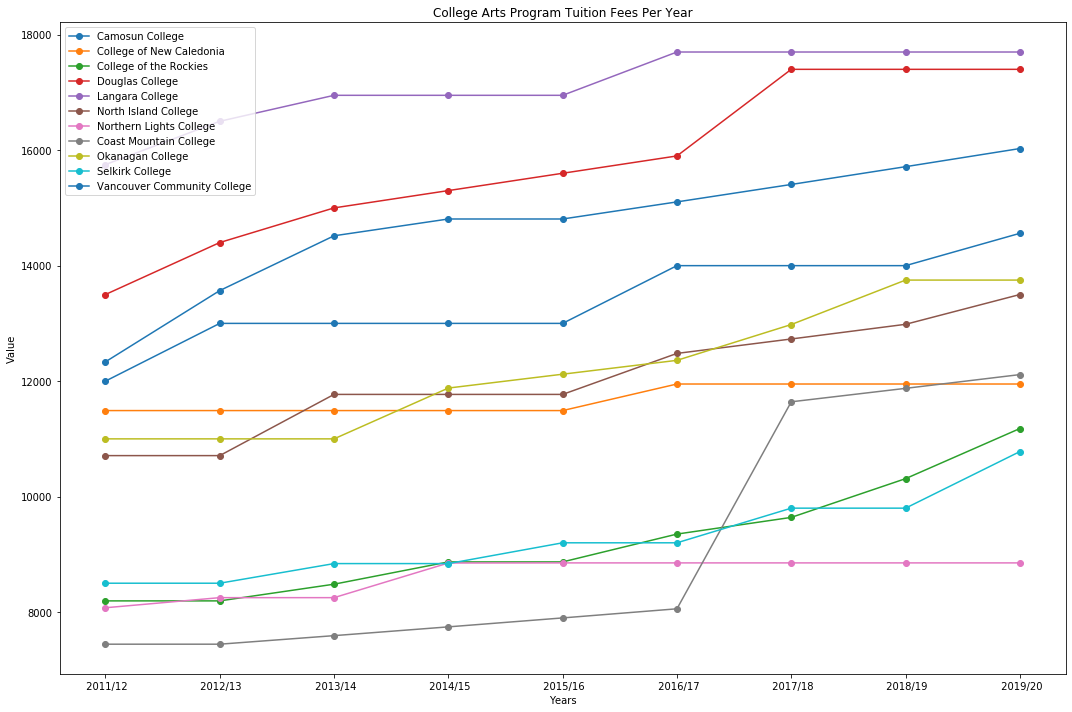

In [18]:
plt.figure(figsize = (15,10))

num = 0 
for i in x:
    plt.plot(df.loc[(df['Sector'] == 'College') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Sector'] == 'College') & (df['Institution'] == i)]['Value'],
            label= x[num], marker = 'o')
    num = num + 1
    
plt.legend()
plt.title('College Arts Program Tuition Fees Per Year')
plt.ylabel('Value')
plt.xlabel('Years')
plt.tight_layout()

### Institute

In [19]:
df.loc[df['Sector'] == 'Institute']['Institution'].value_counts()

Nicola Valley Institute of Technology       9
British Columbia Institute of Technology    9
Justice Institute of British Columbia       8
Name: Institution, dtype: int64

In [20]:
x = df.loc[df['Sector'] == 'Institute']['Institution'].unique()

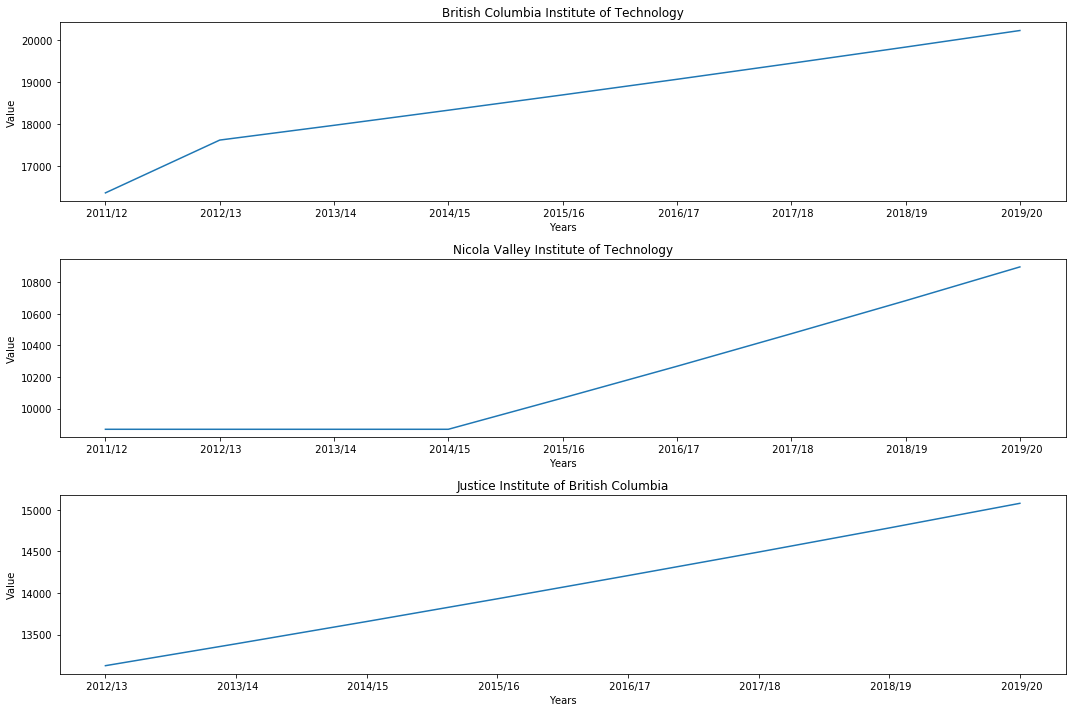

In [21]:
fig, ax = plt.subplots(3,figsize = (15,10))

num = 0 

for i in x:
    ax[num].plot(df.loc[(df['Sector'] == 'Institute') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Sector'] == 'Institute') & (df['Institution'] == i)]['Value'])
    ax[num].set_xlabel('Years')
    ax[num].set_ylabel('Value')
    ax[num].set_title(i)
    num = num + 1    
    
plt.tight_layout()

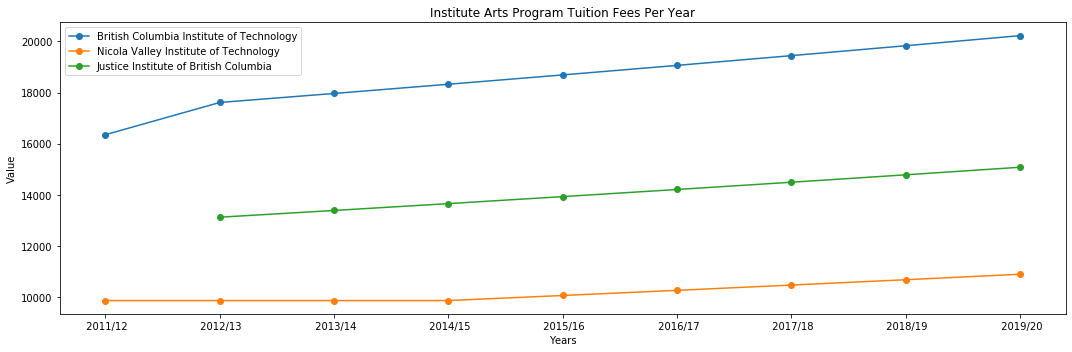

In [22]:
plt.figure(figsize = (15,5))

num = 0 
for i in x:
    plt.plot(df.loc[(df['Sector'] == 'Institute') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Sector'] == 'Institute') & (df['Institution'] == i)]['Value'],
            label= x[num], marker = 'o')
    num = num + 1
    
plt.legend()
plt.title('Institute Arts Program Tuition Fees Per Year')
plt.ylabel('Value')
plt.xlabel('Years')
plt.tight_layout()

### Teaching-Intensive University

In [23]:
df.loc[df['Sector'] == 'Teaching-Intensive University']['Institution'].value_counts()

Emily Carr University of Art + Design    9
Royal Roads University                   9
Vancouver Island University              9
Kwantlen Polytechnic University          9
University of the Fraser Valley          9
Capilano University                      9
Thompson Rivers University               9
Name: Institution, dtype: int64

In [24]:
x = df.loc[df['Sector'] == 'Teaching-Intensive University']['Institution'].unique()

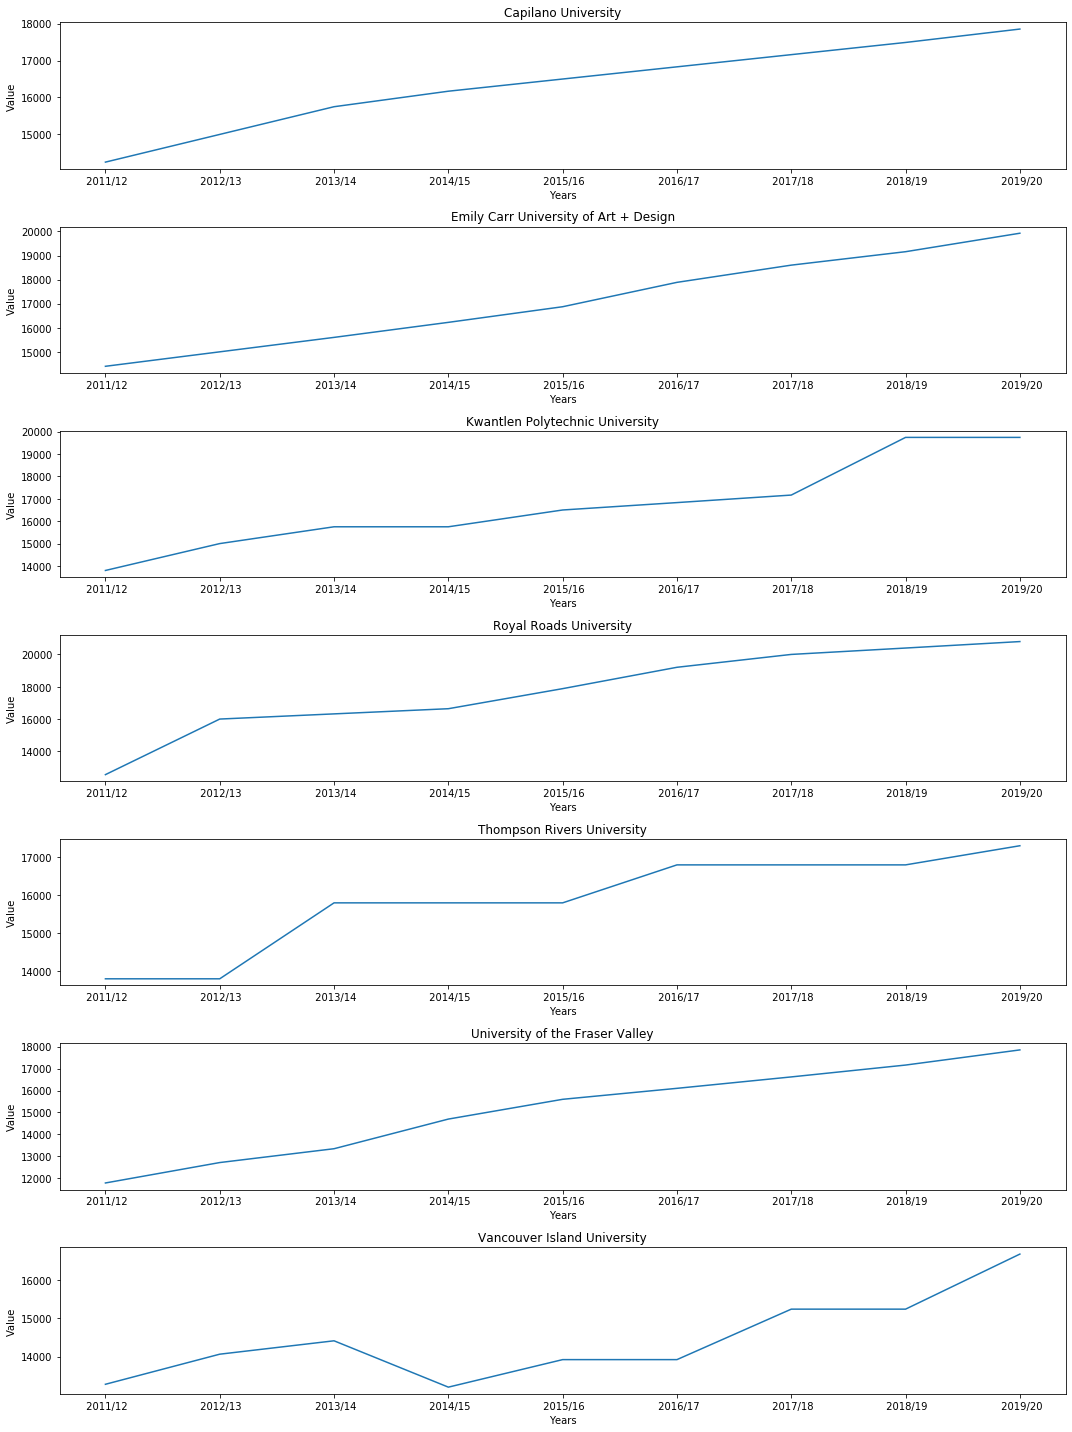

In [25]:
fig, ax = plt.subplots(7,figsize = (15,20))

num = 0 

for i in x:
    ax[num].plot(df.loc[(df['Sector'] == 'Teaching-Intensive University') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Sector'] == 'Teaching-Intensive University') & (df['Institution'] == i)]['Value'])
    ax[num].set_xlabel('Years')
    ax[num].set_ylabel('Value')
    ax[num].set_title(i)
    num = num + 1    
    
plt.tight_layout()

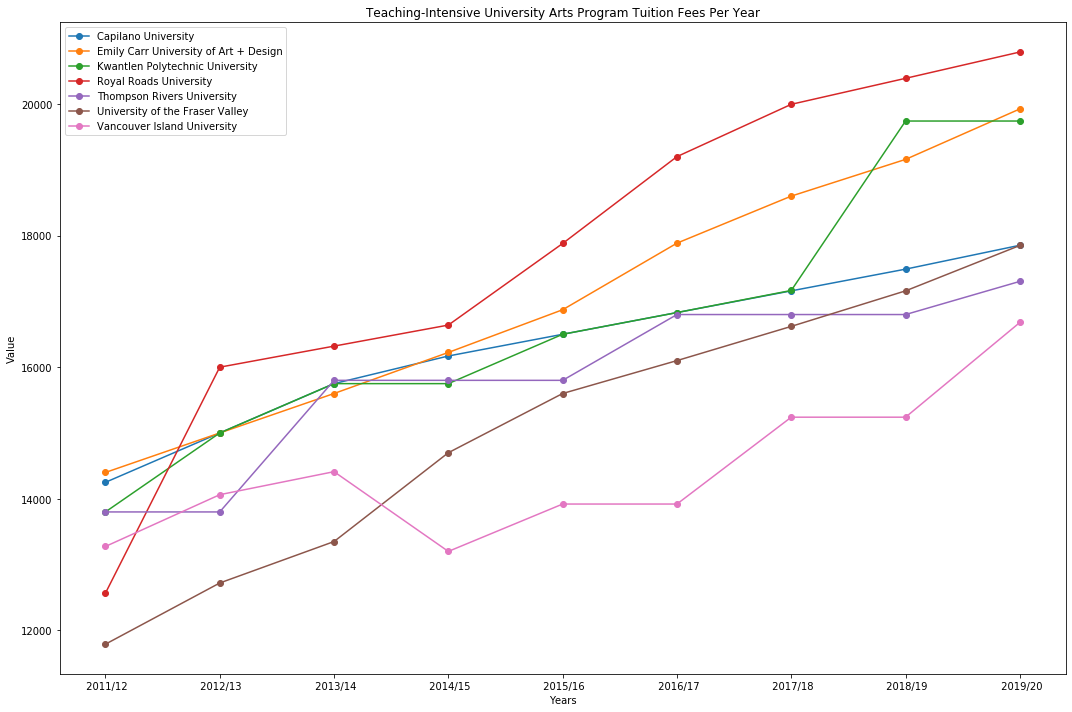

In [26]:
plt.figure(figsize = (15,10))

num = 0 
for i in x:
    plt.plot(df.loc[(df['Sector'] == 'Teaching-Intensive University') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Sector'] == 'Teaching-Intensive University') & (df['Institution'] == i)]['Value'],
            label= x[num], marker = 'o')
    num = num + 1
    
plt.legend()
plt.title('Teaching-Intensive University Arts Program Tuition Fees Per Year')
plt.ylabel('Value')
plt.xlabel('Years')
plt.tight_layout()

### Research-Intensive University

In [27]:
df.loc[df['Sector'] == 'Research-Intensive University']['Institution'].value_counts()

University of Victoria                     9
University of British Columbia             9
Simon Fraser University                    9
University of Northern British Columbia    9
Name: Institution, dtype: int64

In [28]:
x = df.loc[df['Sector'] == 'Research-Intensive University']['Institution'].unique()

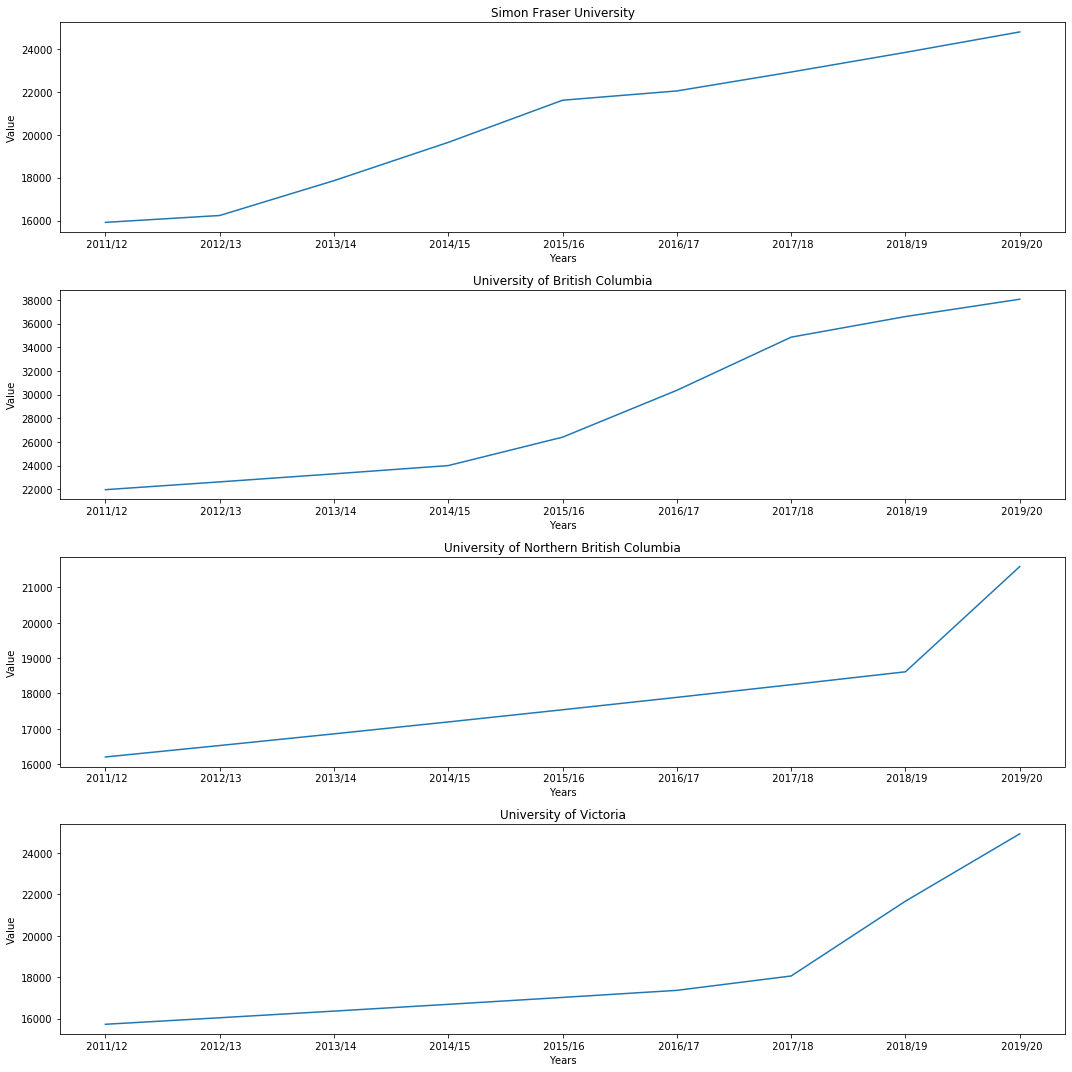

In [29]:
fig, ax = plt.subplots(4,figsize = (15,15))

num = 0 

for i in x:
    ax[num].plot(df.loc[(df['Sector'] == 'Research-Intensive University') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Sector'] == 'Research-Intensive University') & (df['Institution'] == i)]['Value'])
    ax[num].set_xlabel('Years')
    ax[num].set_ylabel('Value')
    ax[num].set_title(i)
    num = num + 1    
    
plt.tight_layout()

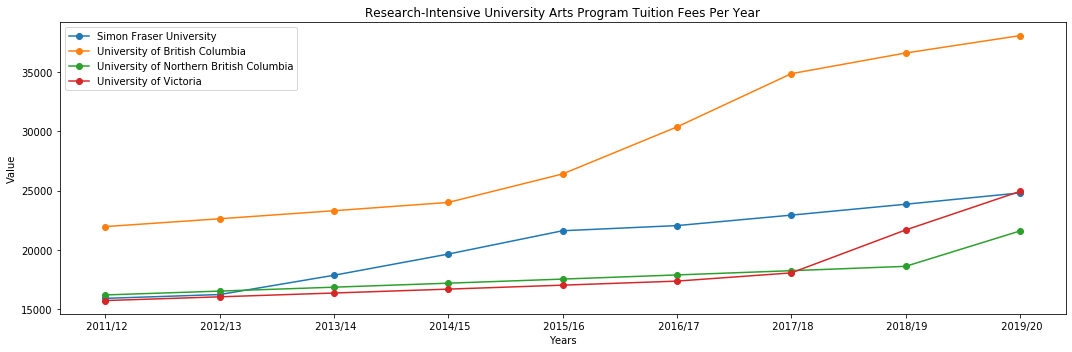

In [30]:
plt.figure(figsize = (15,5))

num = 0 
for i in x:
    plt.plot(df.loc[(df['Sector'] == 'Research-Intensive University') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Sector'] == 'Research-Intensive University') & (df['Institution'] == i)]['Value'],
            label= x[num], marker = 'o')
    num = num + 1
    
plt.legend()
plt.title('Research-Intensive University Arts Program Tuition Fees Per Year')
plt.ylabel('Value')
plt.xlabel('Years')
plt.tight_layout()

# EDA Part II : Economic Development Region

### Vancouver Island/Coast

In [31]:
df['Economic Development Region'].unique()

array(['Vancouver Island/Coast', 'Cariboo', 'Kootenay',
       'Mainland/Southwest', 'North', 'Thompson Okanagan'], dtype=object)

In [32]:
df.loc[df['Economic Development Region'] == 'Vancouver Island/Coast']['Institution'].value_counts()

North Island College           9
University of Victoria         9
Royal Roads University         9
Vancouver Island University    9
Camosun College                9
Name: Institution, dtype: int64

In [33]:
x = df.loc[df['Economic Development Region'] == 'Vancouver Island/Coast']['Institution'].unique()

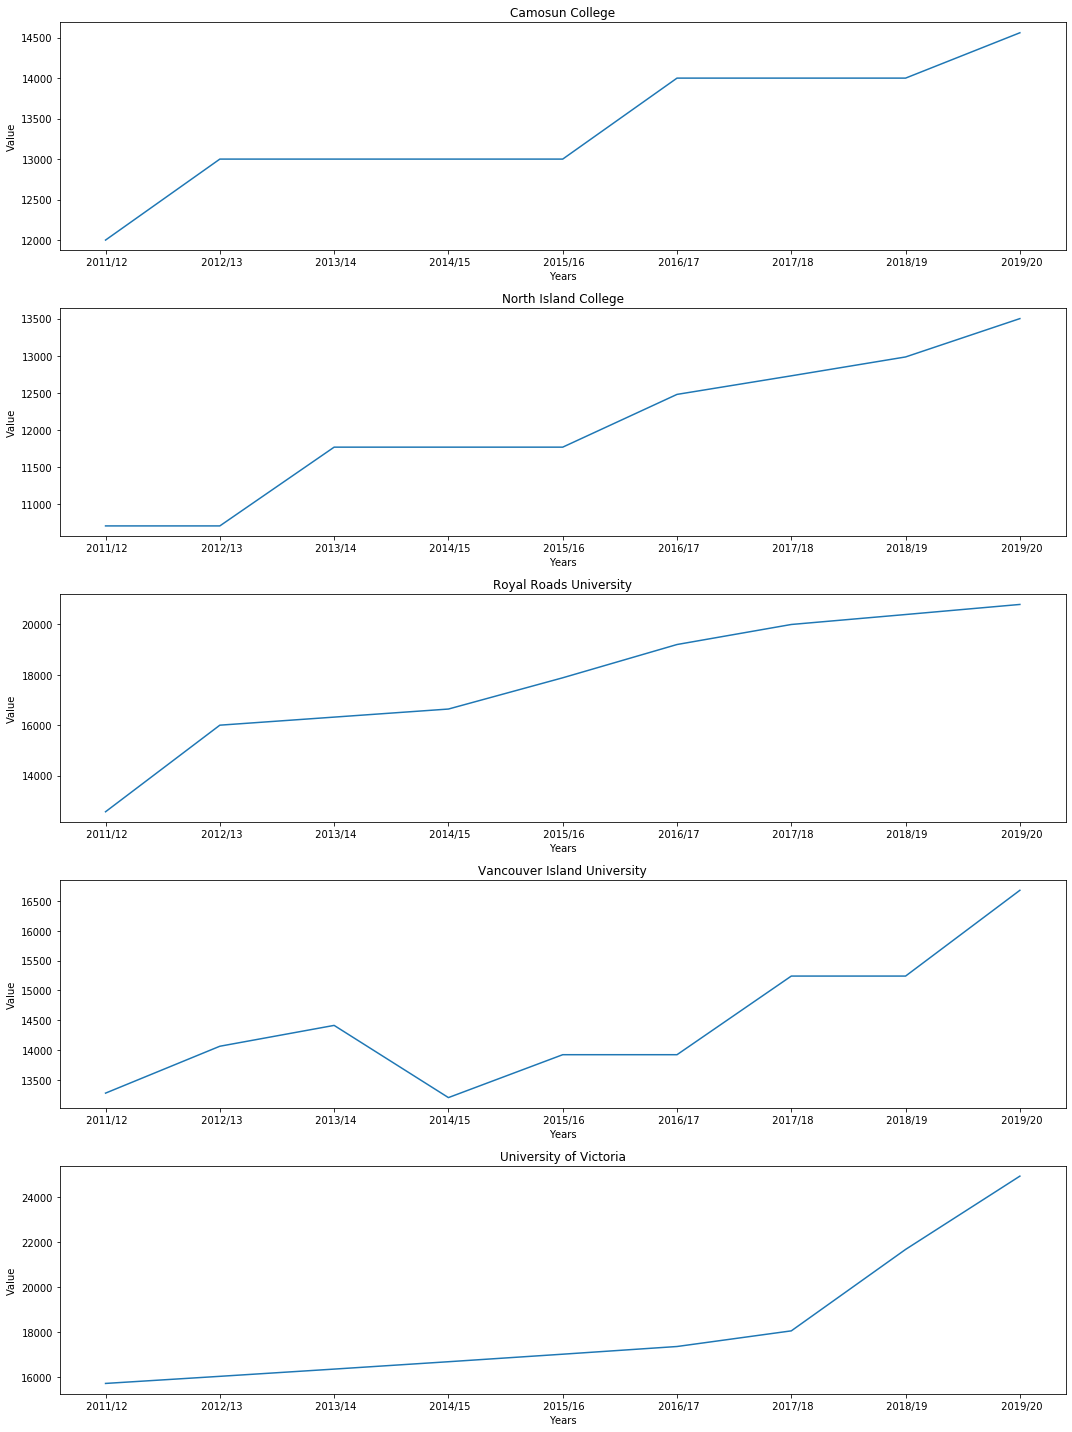

In [34]:
fig, ax = plt.subplots(5,figsize = (15,20))

num = 0 

for i in x:
    ax[num].plot(df.loc[(df['Economic Development Region'] == 'Vancouver Island/Coast') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Economic Development Region'] == 'Vancouver Island/Coast') & (df['Institution'] == i)]['Value'])
    ax[num].set_xlabel('Years')
    ax[num].set_ylabel('Value')
    ax[num].set_title(i)
    num = num + 1    
    
plt.tight_layout()

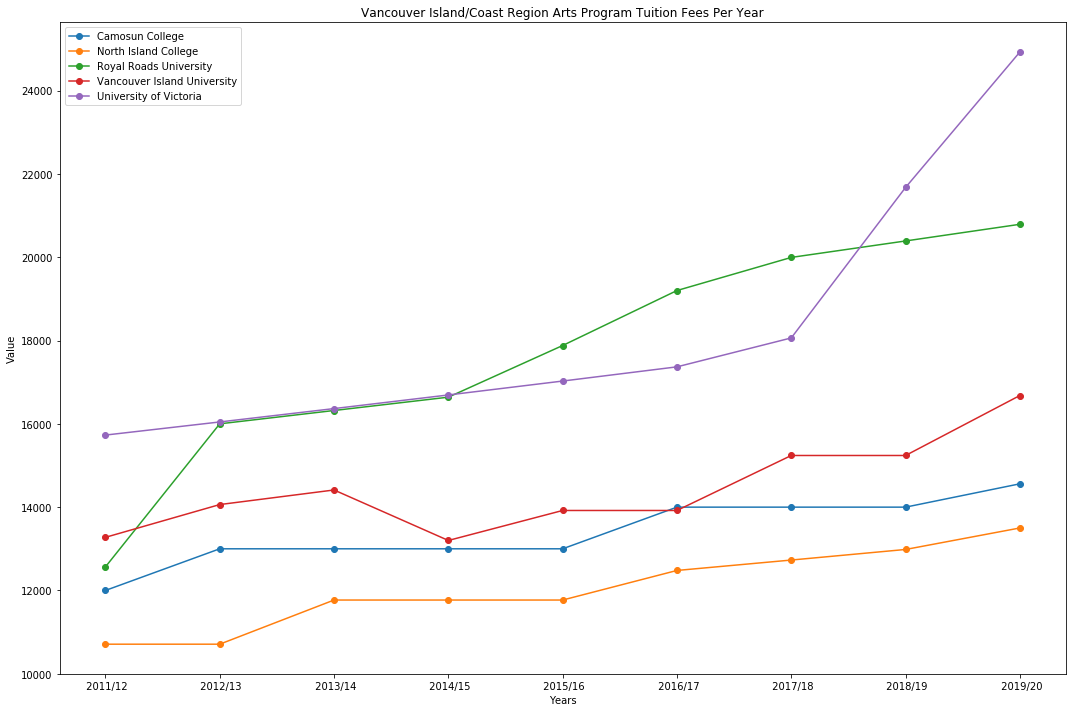

In [35]:
plt.figure(figsize = (15,10))

num = 0 
for i in x:
    plt.plot(df.loc[(df['Economic Development Region'] == 'Vancouver Island/Coast') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Economic Development Region'] == 'Vancouver Island/Coast') & (df['Institution'] == i)]['Value'],
            label= x[num], marker = 'o')
    num = num + 1
    
plt.legend()
plt.title('Vancouver Island/Coast Region Arts Program Tuition Fees Per Year')
plt.ylabel('Value')
plt.xlabel('Years')
plt.tight_layout()

### Cariboo

In [36]:
df.loc[df['Economic Development Region'] == 'Cariboo']['Institution'].value_counts()

University of Northern British Columbia    9
College of New Caledonia                   9
Name: Institution, dtype: int64

In [37]:
x = df.loc[df['Economic Development Region'] == 'Cariboo']['Institution'].unique()

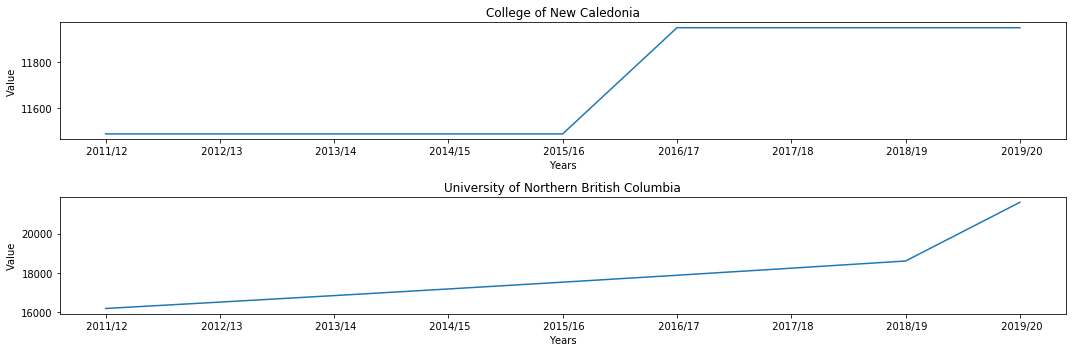

In [38]:
fig, ax = plt.subplots(2,figsize = (15,5))

num = 0 

for i in x:
    ax[num].plot(df.loc[(df['Economic Development Region'] == 'Cariboo') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Economic Development Region'] == 'Cariboo') & (df['Institution'] == i)]['Value'])
    ax[num].set_xlabel('Years')
    ax[num].set_ylabel('Value')
    ax[num].set_title(i)
    num = num + 1    
    
plt.tight_layout()

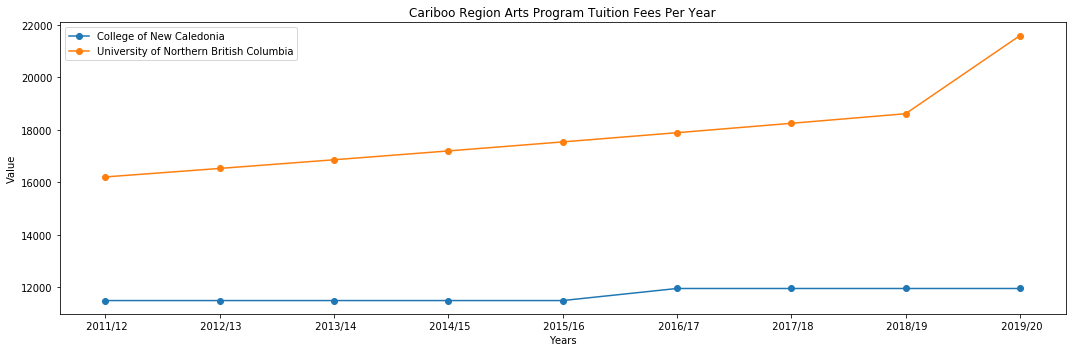

In [39]:
plt.figure(figsize = (15,5))

num = 0 
for i in x:
    plt.plot(df.loc[(df['Economic Development Region'] == 'Cariboo') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Economic Development Region'] == 'Cariboo') & (df['Institution'] == i)]['Value'],
            label= x[num], marker = 'o')
    num = num + 1
    
plt.legend()
plt.title('Cariboo Region Arts Program Tuition Fees Per Year')
plt.ylabel('Value')
plt.xlabel('Years')
plt.tight_layout()

### Kootenay

In [40]:
df.loc[df['Economic Development Region'] == 'Kootenay']['Institution'].value_counts()

College of the Rockies    9
Selkirk College           9
Name: Institution, dtype: int64

In [41]:
x = df.loc[df['Economic Development Region'] == 'Kootenay']['Institution'].unique()

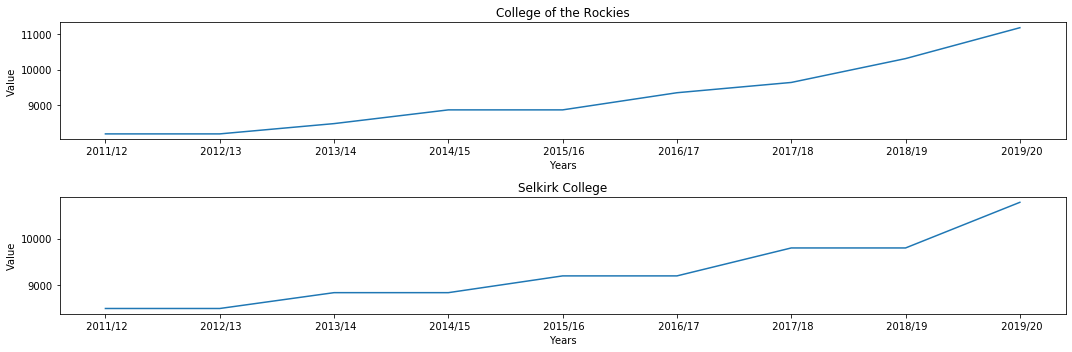

In [42]:
fig, ax = plt.subplots(2,figsize = (15,5))

num = 0 

for i in x:
    ax[num].plot(df.loc[(df['Economic Development Region'] == 'Kootenay') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Economic Development Region'] == 'Kootenay') & (df['Institution'] == i)]['Value'])
    ax[num].set_xlabel('Years')
    ax[num].set_ylabel('Value')
    ax[num].set_title(i)
    num = num + 1    
    
plt.tight_layout()

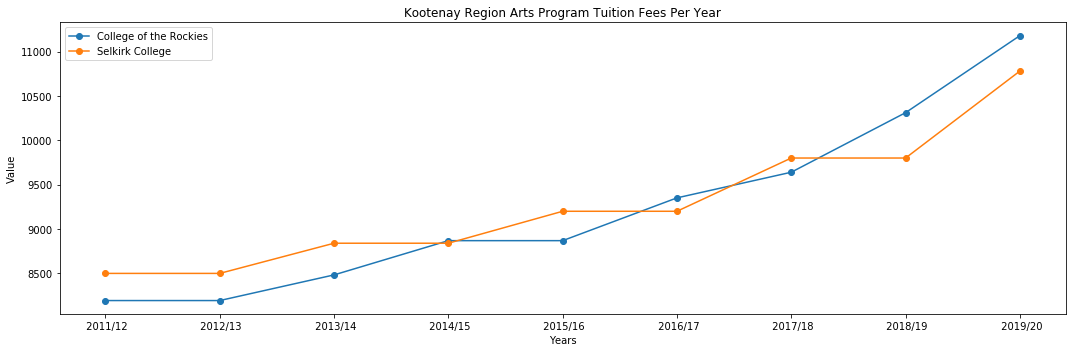

In [43]:
plt.figure(figsize = (15,5))

num = 0 
for i in x:
    plt.plot(df.loc[(df['Economic Development Region'] == 'Kootenay') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Economic Development Region'] == 'Kootenay') & (df['Institution'] == i)]['Value'],
            label= x[num], marker = 'o')
    num = num + 1
    
plt.legend()
plt.title('Kootenay Region Arts Program Tuition Fees Per Year')
plt.ylabel('Value')
plt.xlabel('Years')
plt.tight_layout()

### Mainland/Southwest

In [44]:
df.loc[df['Economic Development Region'] == 'Mainland/Southwest']['Institution'].value_counts()

Douglas College                             9
Emily Carr University of Art + Design       9
Vancouver Community College                 9
Simon Fraser University                     9
Kwantlen Polytechnic University             9
British Columbia Institute of Technology    9
University of the Fraser Valley             9
University of British Columbia              9
Capilano University                         9
Langara College                             9
Justice Institute of British Columbia       8
Name: Institution, dtype: int64

In [45]:
x = df.loc[df['Economic Development Region'] == 'Mainland/Southwest']['Institution'].unique()

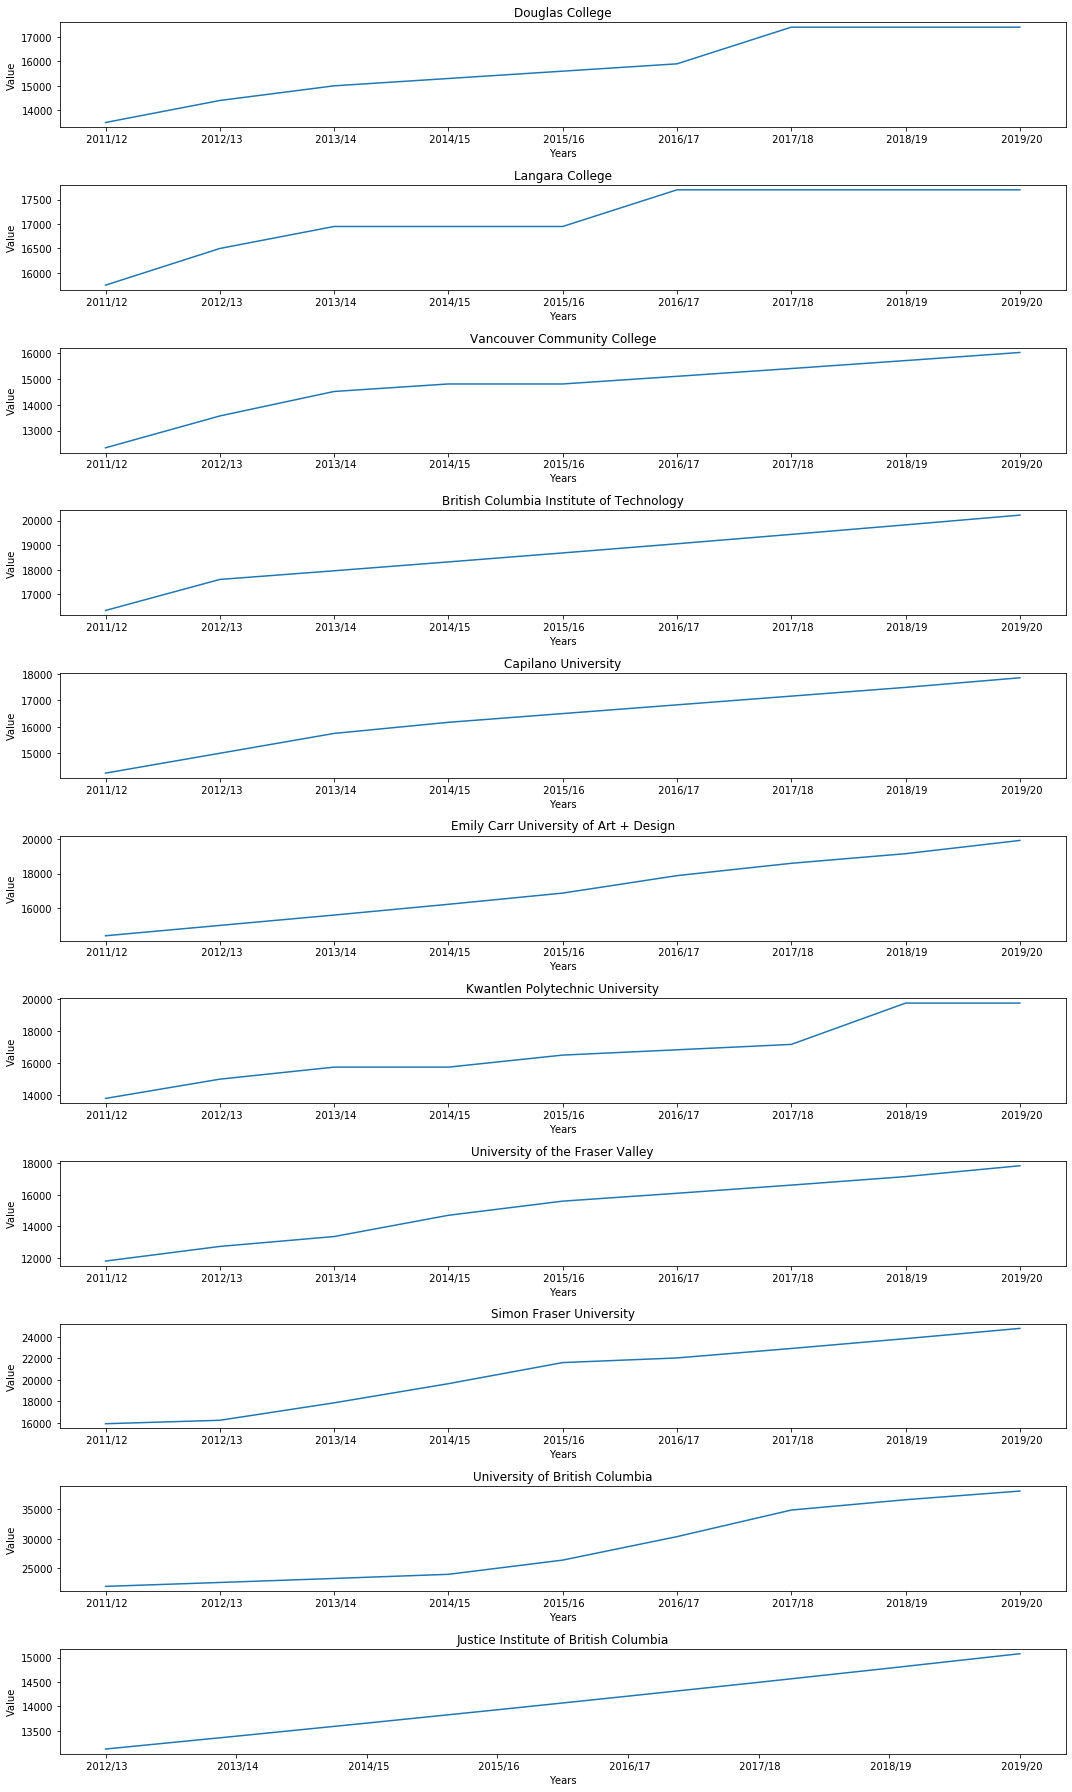

In [50]:
fig, ax = plt.subplots(11,figsize = (15,25))

num = 0 

for i in x:
    ax[num].plot(df.loc[(df['Economic Development Region'] == 'Mainland/Southwest') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Economic Development Region'] == 'Mainland/Southwest') & (df['Institution'] == i)]['Value'])
    ax[num].set_xlabel('Years')
    ax[num].set_ylabel('Value')
    ax[num].set_title(i)
    num = num + 1    
    
plt.tight_layout()

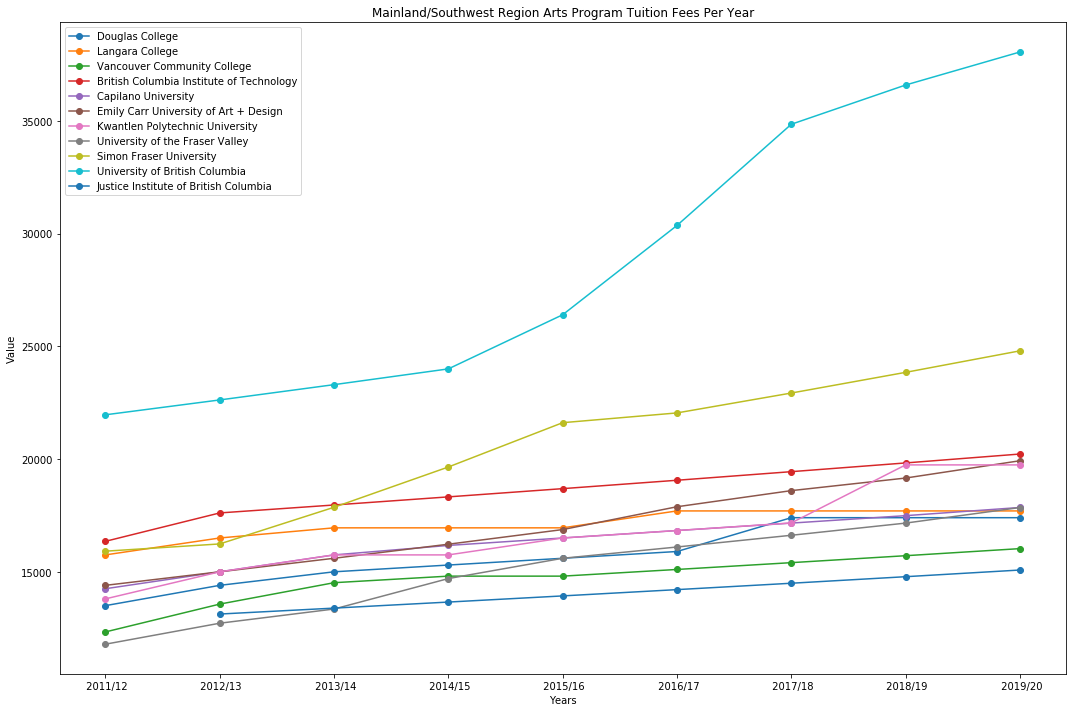

In [52]:
plt.figure(figsize = (15,10))

num = 0 
for i in x:
    plt.plot(df.loc[(df['Economic Development Region'] == 'Mainland/Southwest') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Economic Development Region'] == 'Mainland/Southwest') & (df['Institution'] == i)]['Value'],
            label= x[num], marker = 'o')
    num = num + 1
    
plt.legend()
plt.title('Mainland/Southwest Region Arts Program Tuition Fees Per Year')
plt.ylabel('Value')
plt.xlabel('Years')
plt.tight_layout()

### North

In [53]:
df.loc[df['Economic Development Region'] == 'North']['Institution'].value_counts()

Northern Lights College    9
Coast Mountain College     9
Name: Institution, dtype: int64

In [55]:
x = df.loc[df['Economic Development Region'] == 'North']['Institution'].unique()

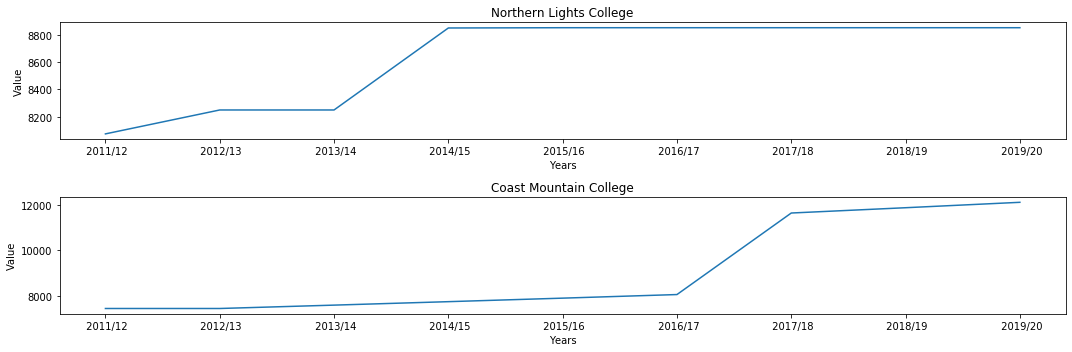

In [56]:
fig, ax = plt.subplots(2,figsize = (15,5))

num = 0 

for i in x:
    ax[num].plot(df.loc[(df['Economic Development Region'] == 'North') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Economic Development Region'] == 'North') & (df['Institution'] == i)]['Value'])
    ax[num].set_xlabel('Years')
    ax[num].set_ylabel('Value')
    ax[num].set_title(i)
    num = num + 1    
    
plt.tight_layout()

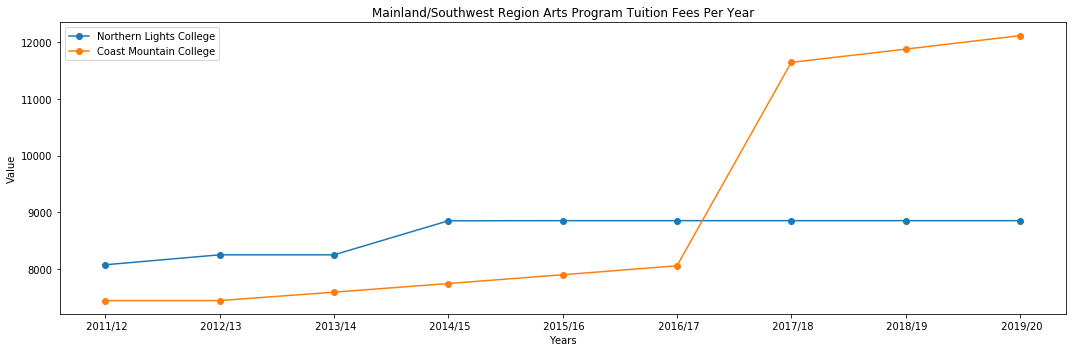

In [58]:
plt.figure(figsize = (15,5))

num = 0 
for i in x:
    plt.plot(df.loc[(df['Economic Development Region'] == 'North') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Economic Development Region'] == 'North') & (df['Institution'] == i)]['Value'],
            label= x[num], marker = 'o')
    num = num + 1
    
plt.legend()
plt.title('North Region Arts Program Tuition Fees Per Year')
plt.ylabel('Value')
plt.xlabel('Years')
plt.tight_layout()

### Thompson Okanagan

In [59]:
df.loc[df['Economic Development Region'] == 'Thompson Okanagan']['Institution'].value_counts()

Nicola Valley Institute of Technology    9
Okanagan College                         9
Thompson Rivers University               9
Name: Institution, dtype: int64

In [60]:
x = df.loc[df['Economic Development Region'] == 'Thompson Okanagan']['Institution'].unique()

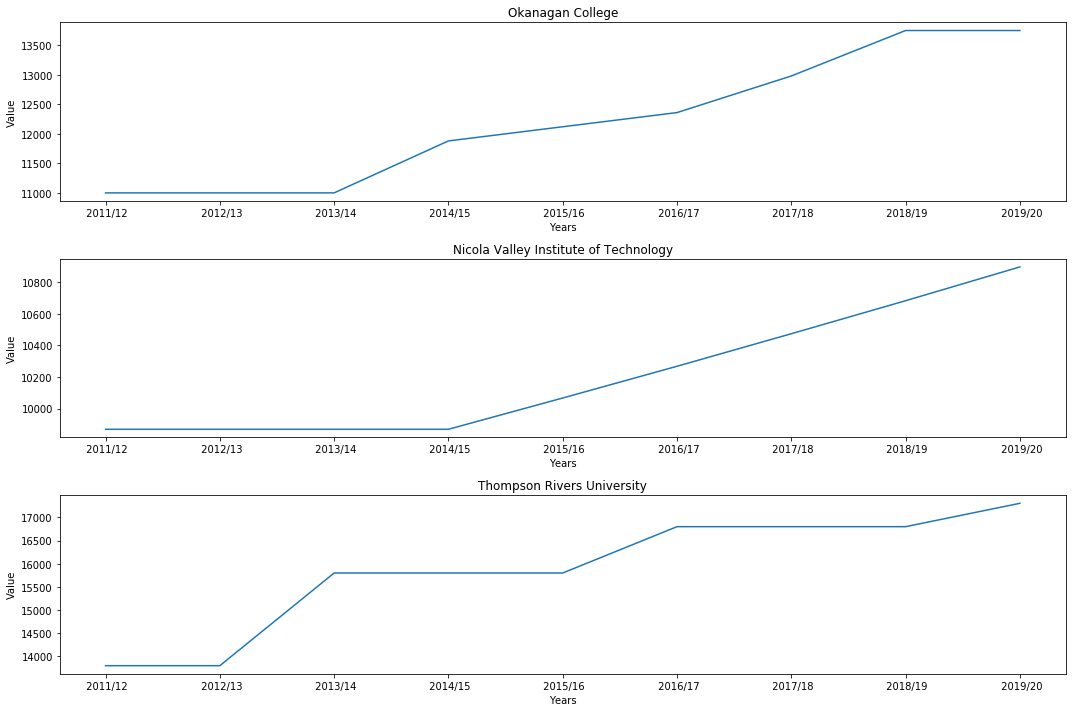

In [62]:
fig, ax = plt.subplots(3,figsize = (15,10))

num = 0 

for i in x:
    ax[num].plot(df.loc[(df['Economic Development Region'] == 'Thompson Okanagan') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Economic Development Region'] == 'Thompson Okanagan') & (df['Institution'] == i)]['Value'])
    ax[num].set_xlabel('Years')
    ax[num].set_ylabel('Value')
    ax[num].set_title(i)
    num = num + 1    
    
plt.tight_layout()

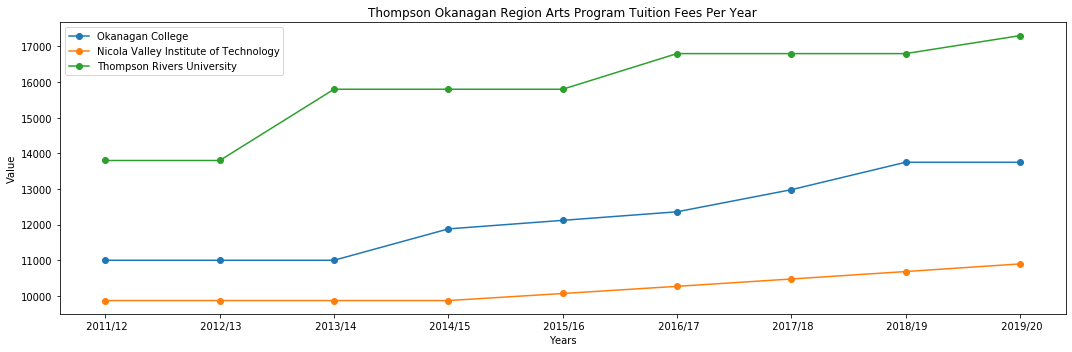

In [65]:
plt.figure(figsize = (15,5))

num = 0 
for i in x:
    plt.plot(df.loc[(df['Economic Development Region'] == 'Thompson Okanagan') & (df['Institution'] == i)]['Year'],
            df.loc[(df['Economic Development Region'] == 'Thompson Okanagan') & (df['Institution'] == i)]['Value'],
            label= x[num], marker = 'o')
    num = num + 1
    
plt.legend()
plt.title('Thompson Okanagan Region Arts Program Tuition Fees Per Year')
plt.ylabel('Value')
plt.xlabel('Years')
plt.tight_layout()